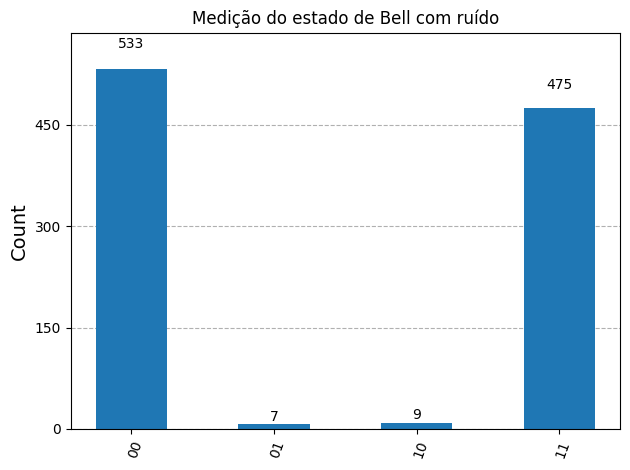

In [4]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

classical_channel = ClassicalRegister(2)
qubits = QuantumRegister(2)
bell = QuantumCircuit(qubits,classical_channel)
bell.h(0)
bell.cx(0,1)

bell.measure([0, 1], [0, 1])


#Criando um simulador
simulator = AerSimulator()

#Chamar os serviços e obter os dados do Backend
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")

#Armazenar os dados
noise_model = NoiseModel.from_backend(backend)

#Tranpilador 
transpile_bell= transpile(bell,backend)

#Resultados
job = simulator.run(transpile_bell).result()
job = simulator.run(transpile_bell, noise_model=noise_model).result()
counts = job.get_counts(0)

plot_histogram(counts, title="Medição do estado de Bell com ruído")